In [3]:
#Linkando libs externas ao colab
%pip install sdv
%pip install matplotlib==3.1.3
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: matplotlib is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for matplotlib did not run successfully.
  │ exit code: 1
  ╰─> [503 lines of output]
      Edit setup.cfg to change the build options
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.1.3]
            python: yes [3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit
                        (AMD64)]]
          platform: yes [win32]
      
      OPTIONAL SUBPACKAGES
       sample_data: yes [installing]
             tests: no  [skipping due to configuration]
      
      OPTIONAL BACKEND EXTENSIONS
               agg: yes [installing]
             tkagg: yes [ins

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import random
import math

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sdv.lite import TabularPreset
from sdv.sampling.tabular import Condition

import string

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Link para o dataset utilizado: https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset?resource=download
# O objetivo é classificar a posição de cada jogador, dado seus atributos no jogo FIFA 18

#Kernels do Kaggle similares:
#https://www.kaggle.com/code/mahamatsaleh/140201132-fifa-predict-player-position

DATASET_URL = 'https://drive.google.com/uc?id=1DPg-vED9mNs9fICGKuLj8Srhb9RQ7fmI&confirm=t'
original_dataset = pd.read_csv(DATASET_URL)
dataset = original_dataset.copy()
dataset.drop(dataset.columns[0], axis=1, inplace=True)

TRAIN_SIZE = 2/(3.0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#17981 instâncias e 74 atributos(já descontando a coluna com os ids)
dataset.shape

(17981, 74)

In [ ]:
dataset.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [ ]:
dataset['Nationality'].unique()

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Poland',
       'Spain', 'Belgium', 'Chile', 'Croatia', 'Wales', 'Italy',
       'Slovenia', 'France', 'Gabon', 'Sweden', 'Netherlands', 'Denmark',
       'Slovakia', 'England', 'Colombia', 'Austria', 'Greece',
       'Czech Republic', 'Costa Rica', 'Armenia', 'Bosnia Herzegovina',
       'Ivory Coast', 'Senegal', 'Switzerland', 'Morocco', 'Guinea',
       'Egypt', 'Algeria', 'Cameroon', 'Serbia', 'Japan', 'Turkey',
       'Ecuador', 'Montenegro', 'Korea Republic', 'Kenya', 'Iceland',
       'Mexico', 'Norway', 'DR Congo', 'Ukraine', 'Russia', 'Finland',
       'Republic of Ireland', 'United States', 'Venezuela', 'Ghana',
       'Uzbekistan', 'Nigeria', 'Canada', 'Paraguay', 'Romania',
       'Albania', 'Burkina Faso', 'Cape Verde', 'New Zealand',
       'Northern Ireland', 'Syria', 'Peru', 'Scotland', 'Bulgaria',
       'Angola', 'Australia', 'South Africa', 'Jamaica', 'Tunisia',
       'Mozambique', 'Iran', 'Mali', 'Cub

Text(0.5, 0, 'Age')

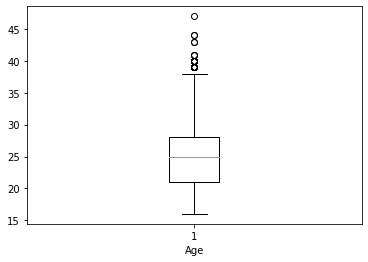

In [ ]:
plt.boxplot(dataset['Age'])
plt.xlabel('Age')

#Irei avaliar mais para frente se vale a pena remover esses outliers aqui ou não

In [ ]:
# O jogador mais velho do dataset
dataset.loc[dataset['Age'].idxmax()]

Name                                            B. Richardson
Age                                                        47
Photo          https://cdn.sofifa.org/48/18/players/11728.png
Nationality                                           England
Flag                      https://cdn.sofifa.org/flags/14.png
                                    ...                      
RM                                                        NaN
RS                                                        NaN
RW                                                        NaN
RWB                                                       NaN
ST                                                        NaN
Name: 17977, Length: 74, dtype: object

Text(0.5, 0, 'Overall')

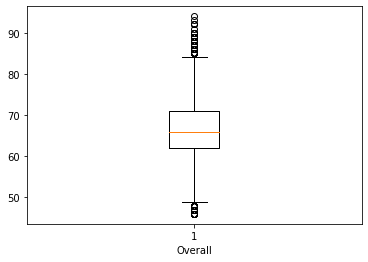

In [ ]:
#Não posso desconsiderar os outliers nessa situação, pois eles são os melhores jogadores, com o overall mais alto
plt.boxplot(dataset['Overall'])
plt.xlabel('Overall')

In [ ]:
def execute_data_preprocessing(dataset):
  #https://scikit-learn.org/stable/modules/preprocessing.html

  df = dataset.copy()

  #dataset está ordenado de forma decrescente pela coluna 'Overall'
  #realizando um embaralhamento dos dados
  df = df.sample(frac=1).reset_index(drop=True)

  #atribuindo 0 para os valores NaN
  df = df.fillna(0.0)

  #criando colunas 'Value (M)','Wage (M)' e 'Position', parseando os valores das colunas 'Value' e 'Preferred Positions'
  #https://www.kaggle.com/code/habibmrad1983/faceting-with-seaborn
  df['Value Unit'] = df['Value'].str[-1]
  df['Value (M)'] = np.where(df['Value Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
  df['Value (M)'] = df['Value (M)'].astype(float)
  df['Value (M)'] = np.where(df['Value Unit'] == 'M', 
                                      df['Value (M)'], 
                                      df['Value (M)']/1000)
  
  df['Wage Unit'] = df['Wage'].str[-1]
  df['Wage (M)'] = np.where(df['Wage Unit'] == '0', 0, df['Wage'].str[1:-1].replace(r'[a-zA-Z]',''))
  df['Wage (M)'] = df['Wage (M)'].astype(float)
  df['Wage (M)'] = np.where(df['Wage Unit'] == 'M', 
                                      df['Wage (M)'], 
                                      df['Wage (M)']/1000)
  
  df = df.assign(Value=df['Value (M)'], Wage=df['Wage (M)'], Position=df['Preferred Positions'].str.split().str[0])

  #Tratando registros em que o clube do jogador não está preenchido
  df['Club'] = df['Club'].str[:].map(lambda x: x if str(x).lower() != 'nan' else 'Free Agent')

  #transformando atributos categóricos em numéricos
  #https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
  categorical_features = ['Nationality', 'Club']
  categorical_features_transformed = ['Nationality_cat', 'Club_cat']
  categorical_features_encoder = OrdinalEncoder()
  categorical_features_encoder.fit(df[categorical_features])
  df[categorical_features_transformed] = categorical_features_encoder.transform(df[categorical_features])

  #A posição do jogador é o atributo alvo
  # Irei encodá-lo usando o LabelEncoder
  #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
  label_encoder = LabelEncoder()
  label_encoder.fit(df['Position'])
  df['Position_cat'] = label_encoder.transform(df['Position'])

  def parse_player_attribute(att_str):
    att_str = str(att_str)

    if(att_str.lower() == 'nan'):
      return 0

    return eval(att_str)
  
  player_attribute_columns = [
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'Ball control',
    'Composure',
    'Crossing',
    'Curve',
    'Dribbling',
    'Finishing',
    'Free kick accuracy',
    'GK diving',
    'GK handling',
    'GK kicking',
    'GK positioning',
    'GK reflexes',
    'Heading accuracy',
    'Interceptions',
    'Jumping',
    'Long passing',
    'Long shots',
    'Marking',
    'Penalties',
    'Positioning',
    'Reactions',
    'Short passing',
    'Shot power',
    'Sliding tackle',
    'Sprint speed',
    'Stamina',
    'Standing tackle',
    'Strength',
    'Vision',
    'Volleys',
    ]

  for column in player_attribute_columns:
    df[column] = df[column].str[:].map(parse_player_attribute)

  return df, categorical_features_encoder, label_encoder

In [ ]:
dataset, categorical_features_encoder, label_encoder = execute_data_preprocessing(dataset)
dataset.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RWB,ST,Value Unit,Value (M),Wage Unit,Wage (M),Position,Nationality_cat,Club_cat,Position_cat
0,D. Murillo,23,https://cdn.sofifa.org/48/18/players/214081.png,Colombia,https://cdn.sofifa.org/flags/56.png,64,70,CPD Junior Barranquilla,https://cdn.sofifa.org/24/18/teams/101101.png,0.525,...,64.0,53.0,K,0.525,K,0.001,RB,30.0,127.0,10
1,D. Rusov,24,https://cdn.sofifa.org/48/18/players/227654.png,Slovakia,https://cdn.sofifa.org/flags/43.png,64,66,Piast Gliwice,https://cdn.sofifa.org/24/18/teams/111086.png,0.400,...,0.0,0.0,K,0.400,K,0.002,GK,133.0,442.0,5
2,D. Hyam,21,https://cdn.sofifa.org/48/18/players/221281.png,Scotland,https://cdn.sofifa.org/flags/42.png,60,72,Coventry City,https://cdn.sofifa.org/24/18/teams/1800.png,0.325,...,51.0,41.0,K,0.325,K,0.002,CB,129.0,170.0,1
3,R. Petretta,20,https://cdn.sofifa.org/48/18/players/237642.png,Italy,https://cdn.sofifa.org/flags/27.png,60,76,FC Basel,https://cdn.sofifa.org/24/18/teams/896.png,0.400,...,60.0,49.0,K,0.400,K,0.004,LB,77.0,221.0,6
4,V. Le Goff,27,https://cdn.sofifa.org/48/18/players/193148.png,France,https://cdn.sofifa.org/flags/18.png,73,74,FC Lorient,https://cdn.sofifa.org/24/18/teams/217.png,3.700,...,73.0,63.0,M,3.700,K,0.008,LB,54.0,232.0,6


In [ ]:
#Conferindo todas as posições
dataset['Position'].unique()

array(['RB', 'GK', 'CB', 'LB', 'CM', 'LM', 'LWB', 'CAM', 'ST', 'RW', 'RM',
       'RWB', 'CDM', 'LW', 'CF'], dtype=object)

In [ ]:
def plot_histogram(data):
  fig, ax = plt.subplots()

  N, bins, patches = ax.hist(data, edgecolor='black', linewidth=1)
  
  # Random facecolor for each bar
  for i in range(len(N)):
    patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

  # Display the plot
  plt.show()

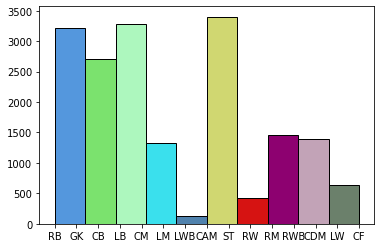

In [ ]:
#plotando distribuição das posições dos jogadores
plot_histogram(dataset['Position'])

In [ ]:
def get_quantity_in_class(dataset, reference_column):
  classes = list(dataset[reference_column].unique())
  quantities = []

  for c in classes:
    quantities.append(len(dataset[dataset[reference_column] == c]))
  
  return classes, quantities

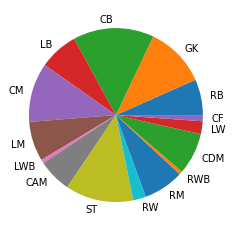

In [ ]:
#Plotando piechart
#https://www.w3schools.com/python/matplotlib_pie_charts.asp
classes, quantities = get_quantity_in_class(dataset, 'Position')

plt.pie(quantities, labels = classes)
plt.show()

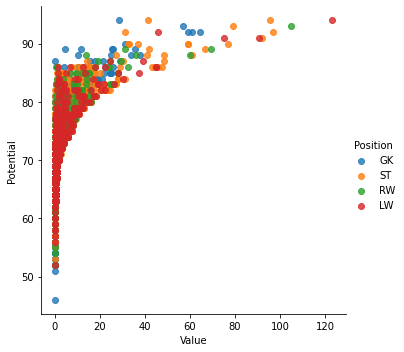

In [ ]:
#https://www.kaggle.com/code/crklausenburg/multivariate
sns.lmplot(x='Value', y='Potential', hue='Position', 
           data=dataset.loc[dataset['Position'].isin(['ST', 'RW', 'LW', 'GK'])], 
           fit_reg=False)

In [ ]:
#definindo colunas a serem utilizadas na preparação dos modelos
model_columns = [
    'Age',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'Ball control',
    'Composure',
    'Crossing',
    'Curve',
    'Dribbling',
    'Finishing',
    'Free kick accuracy',
    'GK diving',
    'GK handling',
    'GK kicking',
    'GK positioning',
    'GK reflexes',
    'Heading accuracy',
    'Interceptions',
    'Jumping',
    'Long passing',
    'Long shots',
    'Marking',
    'Penalties',
    'Positioning',
    'Reactions',
    'Short passing',
    'Shot power',
    'Sliding tackle',
    'Sprint speed',
    'Stamina',
    'Standing tackle',
    'Strength',
    'Vision',
    'Volleys',
    # 'CAM',
    # 'CB',
    # 'CDM',
    # 'CF',
    # 'CM',
    # 'ID',
    # 'LAM',
    # 'LB',
    # 'LCB',
    # 'LCM',
    # 'LDM',
    # 'LF',
    # 'LM',
    # 'LS',
    # 'LW',
    # 'LWB',
    # 'RAM',
    # 'RB',
    # 'RCB',
    # 'RCM',
    # 'RDM',
    # 'RF',
    # 'RM',
    # 'RS',
    # 'RW',
    # 'RWB',
    # 'ST',
    'Value (M)',
    'Wage (M)',
    'Nationality_cat',
    'Club_cat'
]
target_column = 'Position_cat'

In [ ]:
X = dataset[model_columns]
y = dataset[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE)

In [ ]:
#Hora de utilizar os modelos

#Regressão logística: demorando muito para convergir, talvez deva normalizar ou preparar melhor os dados
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

logistic_regressor = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


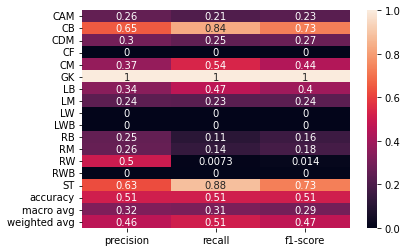

In [ ]:
y_pred_logreg = logistic_regressor.predict(X_test)

clf_report_logreg = classification_report(y_test, y_pred_logreg, target_names= label_encoder.classes_, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report_logreg).iloc[:-1, :].T, annot=True)

In [ ]:
#Para o modelo ficar balanceado, preciso garantir que cada class tenha um número mínimo de instâncias no conjunto de treinamento e teste
#https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50

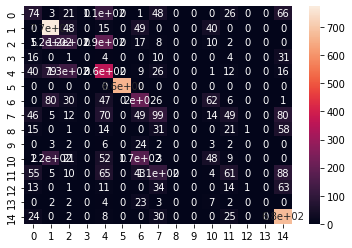

In [ ]:
cf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cf_matrix_logreg, annot=True)

In [ ]:
#Naive Bayes
#https://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

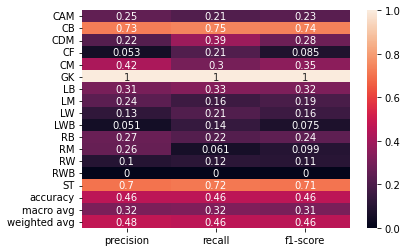

In [ ]:
clf_report_gnb = classification_report(y_test, y_pred_gnb, target_names= label_encoder.classes_, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report_gnb).iloc[:-1, :].T, annot=True)

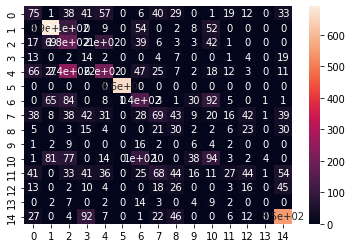

In [ ]:
cf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cf_matrix_gnb, annot=True)

In [ ]:
#SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


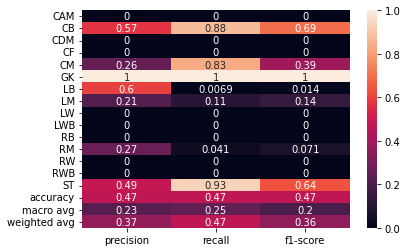

In [ ]:
clf_report_svc = classification_report(y_test, y_pred_svc, target_names= label_encoder.classes_, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report_svc).iloc[:-1, :].T, annot=True)

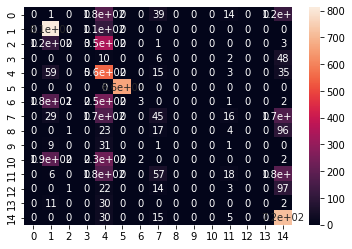

In [ ]:
cf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_matrix_svc, annot=True)

In [ ]:
#Gerar dados sintéticos irá melhorar as métricas dos modelos utilizados?
#https://sdv.dev/SDV/user_guides/single_table/tabular_preset.html#tabular-preset

positions, quantities = get_quantity_in_class(dataset, 'Position')

sampling_conditions = []

max_qtt = max(quantities)
idx_max_qtt = quantities.index(max_qtt)

for i in range(0, len(quantities)):
  if(i != idx_max_qtt):
    sampling_qtt = max_qtt - quantities[i]
    class_data = dataset[dataset['Position'] == positions[i]]

    sampling_conditions.append(Condition(column_values={'Position': positions[i]}, num_rows=sampling_qtt))

sampling_model = TabularPreset(name='FAST_ML')
sampling_model.fit(dataset)

synthetic_data = sampling_model.sample_conditions(conditions=sampling_conditions)

synthetic_data.head()

/usr/local/lib/python3.7/dist-packages/sdv/lite/tabular.py:51: UserWarning: No metadata provided. Metadata will be automatically detected from your data. This process may not be accurate. We recommend writing metadata to ensure correct data handling.
  warnings.warn('No metadata provided. Metadata will be automatically '
Sampling conditions: 100%|██████████| 22594/22594 [00:09<00:00, 2384.61it/s]


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RWB,ST,Value Unit,Value (M),Wage Unit,Wage (M),Position,Nationality_cat,Club_cat,Position_cat
0,L. Marković,23,https://cdn.sofifa.org/48/18/players/187456.png,France,https://cdn.sofifa.org/flags/18.png,65,71,FC Porto,https://cdn.sofifa.org/24/18/teams/101146.png,0.000000,...,19.329309,23.031622,K,0.000000,K,0.000000,RB,80.379979,184.464148,7
1,T. Eaves,25,https://cdn.sofifa.org/48/18/players/237939.png,Colombia,https://cdn.sofifa.org/flags/56.png,70,75,Finn Harps,https://cdn.sofifa.org/24/18/teams/111379.png,10.341792,...,70.493215,78.068117,K,10.342137,K,0.035962,RB,86.742848,458.493816,14
2,G. Montiel,22,https://cdn.sofifa.org/48/18/players/241070.png,Turkey,https://cdn.sofifa.org/flags/48.png,64,75,Ettifaq FC,https://cdn.sofifa.org/24/18/teams/94.png,1.951091,...,78.957138,79.295299,K,1.951562,K,0.016551,RB,50.060101,187.679231,8
3,L. Escorcia,22,https://cdn.sofifa.org/48/18/players/160161.png,Italy,https://cdn.sofifa.org/flags/27.png,68,74,LOSC Lille,https://cdn.sofifa.org/24/18/teams/436.png,4.899683,...,80.681080,83.606237,M,4.904709,K,0.023986,RB,106.375855,426.938077,10
4,N. Barella,32,https://cdn.sofifa.org/48/18/players/194082.png,Denmark,https://cdn.sofifa.org/flags/13.png,76,73,Portsmouth,https://cdn.sofifa.org/24/18/teams/254.png,7.165736,...,43.879758,44.412587,M,7.162417,K,0.032751,RB,123.222128,452.898575,0


In [ ]:
synthetic_data.shape

(22594, 82)

In [ ]:
dataset = pd.concat([dataset, synthetic_data])
dataset.shape

(40575, 82)

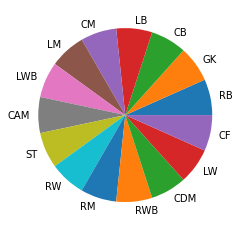

In [ ]:
classes, quantities = get_quantity_in_class(dataset, 'Position')

plt.pie(quantities, labels = classes)
plt.show()

In [ ]:
X = dataset[model_columns]
y = dataset[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE)

In [ ]:
logistic_regressor = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

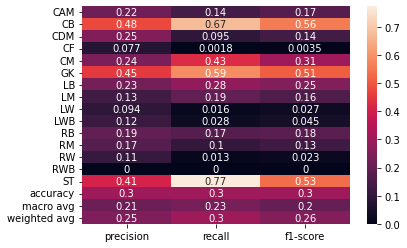

In [ ]:
y_pred_logreg = logistic_regressor.predict(X_test)

clf_report_logreg = classification_report(y_test, y_pred_logreg, target_names= label_encoder.classes_, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report_logreg).iloc[:-1, :].T, annot=True)

In [ ]:
#Não deu muito certo
#Tenho que encontrar uma maneira de que a mesma distribuição dos dados de treinamento seja a dos dados de teste

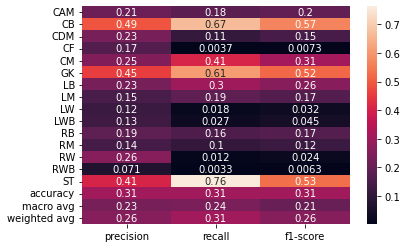

In [ ]:
X = dataset[model_columns]
y = dataset[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)

logistic_regressor = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

y_pred_logreg = logistic_regressor.predict(X_test)

clf_report_logreg = classification_report(y_test, y_pred_logreg, target_names= label_encoder.classes_, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report_logreg).iloc[:-1, :].T, annot=True)

In [ ]:
#Também não deu muito certo
#Porém os valores de precision, recall e F1 foram mais balanceados